### Reading download log information (Client downloading 0.1mb file every minute) 4 clients and 5 proxy nodes

In [1]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

EXP_NAME = "logs/client_var"
RESULTS_DIR = os.path.join( os.getcwd(),'results')

headers = ['time', 'start_transfer', 'download','status','download_size']
proxies = {'10.138.25.67':'5126', '10.139.40.85':'57064', '10.138.77.2':'11252',
           '10.138.57.2':'7193','10.138.85.130':'10473'}

proxyNames = {'57064':'P1', '11252':'P2','5126': 'P3',  '7193':'P4', '10473':'P5'}
clientNames = {'65':'C2', '75':'C4', '132':'C1', '108':'C3'}

colorMap = {'57064':'orange', '11252':'red','5126': 'blue',  '7193':'purple', '10473':'green'}

#Read input files from the directory and returns DataTable object in a combined list
def read_clients_log():
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, f))]  
    print(dirs)
    proxy_data = pd.read_csv(os.path.join('clients.csv'),sep=',')
    #Load results from each node
    nodes_results = None
    for sub_dir in dirs:        
        tunnel_nodes = os.listdir(INPUT_DIR+'/'+sub_dir)
        for tunnel in tunnel_nodes:                
            file = os.path.join(INPUT_DIR+'/'+sub_dir,tunnel)
            tunnel = tunnel[0:tunnel.find(':')]
            try:
                temp = pd.read_csv(file,sep=',', header = None)
                temp.columns = headers
                temp = temp.query('status == 200 & download_size >0')
                temp = temp.set_index(pd.DatetimeIndex(temp.time))
                temp['proxy'] = proxies[tunnel]
                temp['client'] = sub_dir
                temp['download_time'] = temp['download'] - temp['start_transfer']
                nodes_results = pd.concat([nodes_results, temp])
            except Exception as e:
                print(node, 'EXception', e)
    return nodes_results

def getECDF(df, var):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[var].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()
    return ecdf

client_data = read_clients_log()
client_data.head()

['65', '75', '108', '132']


,time,start_transfer,download,status,download_size,proxy,client,download_time
time,,,,,,,,
2018-02-03 12:11:00,2018/02/03 12:11,0.007403,5.428054,200,1048576,5126,65,5.420651
2018-02-03 12:19:00,2018/02/03 12:19,0.007291,5.427816,200,1048576,5126,65,5.420525
2018-02-03 12:20:00,2018/02/03 12:20,0.006953,5.423696,200,1048576,5126,65,5.416743
2018-02-03 12:21:00,2018/02/03 12:21,0.007284,5.419459,200,1048576,5126,65,5.412175
2018-02-03 12:21:00,2018/02/03 12:21,0.007341,5.422289,200,1048576,5126,65,5.414948


### Function to plot variability in latency over time period, to show that best path performance variation changes over time

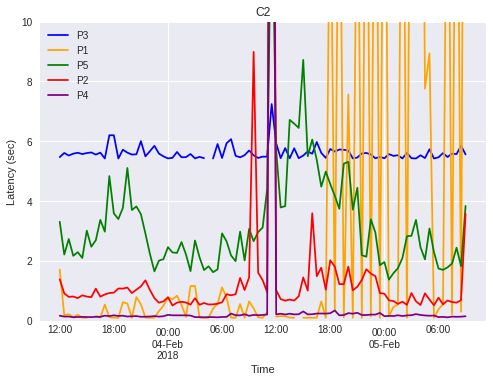

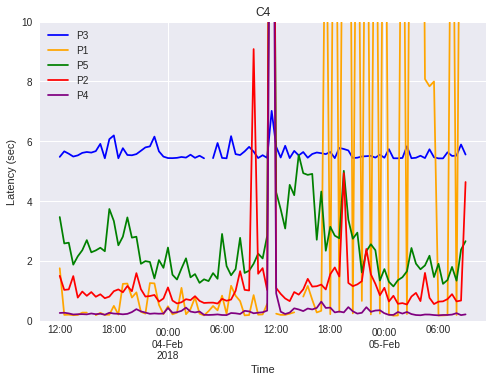

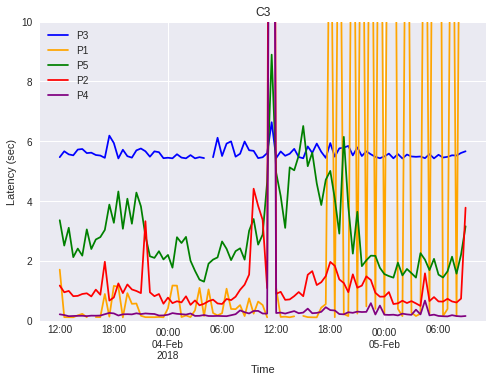

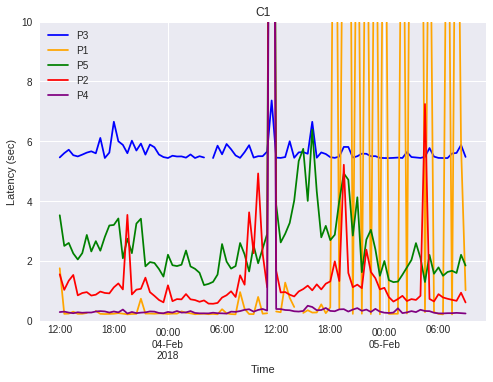

In [54]:
def plot_latency(df_clients,var):    
    clients = df_clients.client.unique()
    for client in clients:                
        df = df_clients.query('client == "'+client+'"')
        proxies = df.proxy.unique()
        labels = []
        for proxy in proxies:
            df_proxy = df.query('proxy == "'+proxy+'"')
            df_proxy = df_proxy.resample('5Min').mean()
            labels.append(proxyNames[proxy])
            df_proxy.resample('30Min').mean()['download'].plot(color=colorMap[proxy])
            #print(client,">",proxy,">",df_proxy['download'].mean())
            #ecdf = getECDF(df_proxy, 'bytes_second')
            #ecdf.plot(logx=True)
            #print(client,":",proxy,":",df_proxy.bytes_second.max())
        plt.legend(labels)
        plt.title(clientNames[client])
        plt.ylabel('Latency (sec)')
        plt.xlabel('Time')
        plt.ylim(0,10)
        #plt.xlim('04-Feb-2018 15:00','04-Feb-2018 18:00',)
        plt.show()

def show_avg_latency(df):
    clients = df.client.unique()
    for client in  clients:
        df_client = df.query('client == "'+client+'"')
        proxies = df_client.proxy.unique()
        for proxy in proxies:
            df_proxy = df.query('proxy == "'+proxy+'"')
            #print(proxy,">", client, ">",df_proxy['download'].mean())

plot_latency(client_data,'download')
show_avg_latency(client_data)

### Randomized selection for every minute compared with uniform random and best, worst scenario

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  # Remove the CWD from sys.path while we load stuff.
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  from ipykernel import kernelapp as app


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913 entries, 2018-02-04 11:41:00 to 2018-02-05 09:11:00
Data columns (total 8 columns):
time              913 non-null object
start_transfer    913 non-null float64
download          913 non-null float64
status            913 non-null int64
download_size     913 non-null int64
proxy             913 non-null object
client            913 non-null object
download_time     913 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 64.2+ KB
None


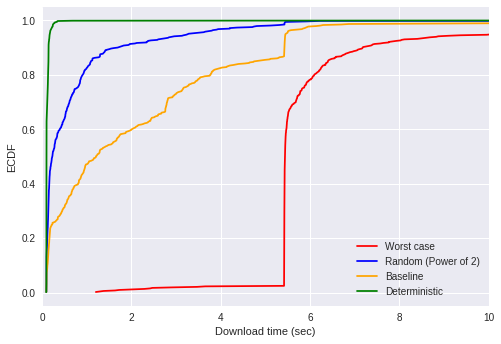

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 924 entries, 2018-02-04 11:41:00 to 2018-02-05 09:07:00
Data columns (total 8 columns):
time              924 non-null object
start_transfer    924 non-null float64
download          924 non-null float64
status            924 non-null int64
download_size     924 non-null int64
proxy             924 non-null object
client            924 non-null object
download_time     924 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 65.0+ KB
None


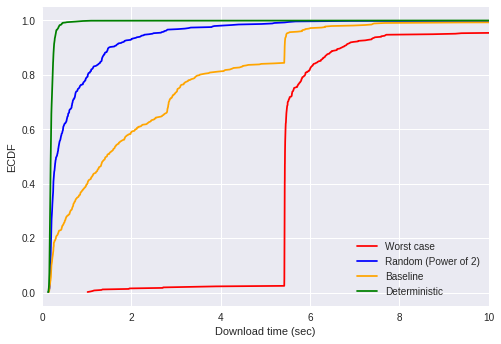

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 911 entries, 2018-02-04 11:44:00 to 2018-02-05 09:15:00
Data columns (total 8 columns):
time              911 non-null object
start_transfer    911 non-null float64
download          911 non-null float64
status            911 non-null int64
download_size     911 non-null int64
proxy             911 non-null object
client            911 non-null object
download_time     911 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 64.1+ KB
None


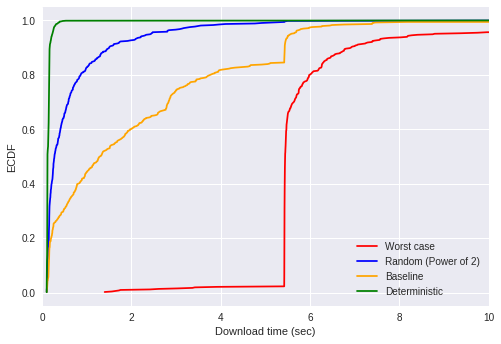

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 922 entries, 2018-02-04 11:41:00 to 2018-02-05 09:20:00
Data columns (total 8 columns):
time              922 non-null object
start_transfer    922 non-null float64
download          922 non-null float64
status            922 non-null int64
download_size     922 non-null int64
proxy             922 non-null object
client            922 non-null object
download_time     922 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 64.8+ KB
None


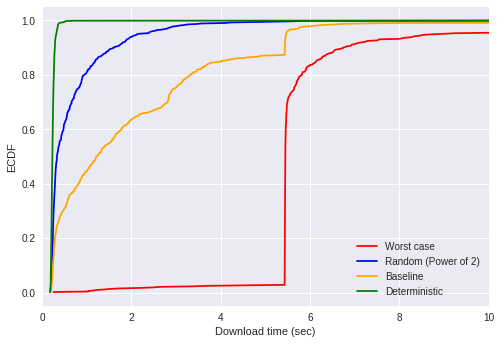

In [11]:
import random
import numpy as np

def plot_perf(df):
    
    clients = df.client.unique()
    for client in  clients:
        df_client = df.query('client == "'+client+'"')
        time_seq = df_client.time.unique()
        idx = df_client.groupby(['time'])['download'].transform(max) == df_client['download']
        worst_df = df_client[idx]
        
        #df_best = df_client.resample('10Min').mean()
        #print(df_best.head())
        idx = df_client.groupby(['time'])['download'].transform(min) == df_client['download']
        best_df = df_client[idx]
        rand_df = pd.DataFrame()
        uni_rand_df = pd.DataFrame()
        for time_st in time_seq:
            df_time = df_client.query("time == '"+time_st+"'")
            proxies = df_time.proxy.unique()
            if len(proxies) > 2:
                rand_choice = random.sample(set(proxies), 2)
                client1 = df_time.query('proxy == "'+rand_choice[0]+'"')
                client2 = df_time.query('proxy == "'+rand_choice[1]+'"')
                if float(client1.download.iloc[0]) > float(client2.download.iloc[0]):
                    rand_df = rand_df.append(client2)
                else:
                    rand_df = rand_df.append(client1)
                uni = random.sample(set(proxies),1)
                uni_rand_df = uni_rand_df.append(df_time.query('proxy == "'+uni[0]+'"'))
            else:
                rand_df = rand_df.append(df_time)
                uni_rand_df = uni_rand_df.append(df_time)
                
        labels = ['Worst case', 'Random (Power of 2)', 'Baseline', 'Deterministic']
        print(best_df.info())
        getECDF(worst_df.resample('5Min').mean(),'download').plot(color='red', legend = 'Worst case')
        getECDF(rand_df.resample('5Min').mean(),'download').plot(color='blue', legend='Random (Power of 2)')
        getECDF(uni_rand_df.resample('5Min').mean(),'download').plot(color='orange', legend='Random')
        getECDF(best_df.resample('Min').mean(),'download').plot(color='green', legend = 'Best case')  
        plt.legend(labels)
        plt.xlabel("Download time (sec)")
        plt.ylabel("ECDF")
        plt.xlim(0,10)
        #plt.title(client)
        plt.show()
        
plot_perf(client_data)

In [53]:
import random
import numpy as np
import datetime

def calculate_random2(df):
    
    df = df.reset_index(drop=True)    
    clients = df.client.unique()    
    overall_rand = pd.DataFrame()
    for client in  clients:
        df_client = df.query('client == "'+client+'"')
        time_seq = df_client.time.unique()
        rand_df = pd.DataFrame()
        next_time = datetime.datetime.strptime("2011/02/04 00:00", '%Y/%m/%d %H:%M')
        rand = None
        listTime = []        
        for time_st in time_seq:
            time_stmp = datetime.datetime.strptime(time_st, '%Y/%m/%d %H:%M')
            
            if next_time < time_stmp:
                df_time = df_client.query("time == '"+time_st+"'")
                proxies = df_time.proxy.unique()
                #Random selection 2
                if len(proxies) > 2:
                    rand_choice = random.sample(set(proxies), 2)                    
                    client1 = df_time[df_time.proxy == rand_choice[0]].head(1)
                    client2 = df_time[df_time.proxy == rand_choice[1]].head(1)                                        
                    if float(client1.download.iloc[0]) > float(client2.download.iloc[0]):
                        rand = client2
                    else:
                        rand = client1
                else:
                    if str(df_time.proxy) == '5126':
                        continue
                    else:
                        rand = df_time          
                next_time = time_stmp + datetime.timedelta(minutes=5)
            else:
                rand['time']  = time_st            
            rand_df = rand_df.append(rand)
        overall_rand = overall_rand.append(rand_df)
    return overall_rand
        
def plot_proxy_client_distr(df):
    df_group = df.groupby(['time','proxy'])['download'].count()
    df_group.plot()
    plt.show()
    plt.xlim('2018 Feb 04', '2018 Feb 05')
    #print(df_group)
        
overall_rand = calculate_random2(client_data)

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


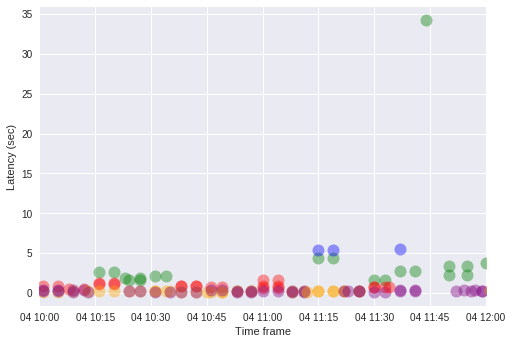

In [90]:
overall_rand =  overall_rand.set_index(overall_rand.time)
overall_rand = overall_rand.sort_index()
#print(overall_rand.groupby(['time','proxy'])['status'].count())

groups = overall_rand.groupby(['time','proxy'])

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    #print(group.time, group.download)
    #print(name[1])
    ax.plot(pd.to_datetime(group.time), group.download, marker='o', linestyle='', ms=12, label=name[1], 
            color=colorMap[name[1]], alpha=0.4)
#ax.legend()
plt.xlim('2018/02/04 10:00','2018/02/04 12:00')
#plt.ylim(0,6)
plt.xlabel('Time frame')
plt.ylabel('Latency (sec)')
plt.show()

#for index, row in overall_rand.iterrows():    
    

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  import sys
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  if sys.path[0] == '':
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: 'time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version


P4
P1
P3
P2


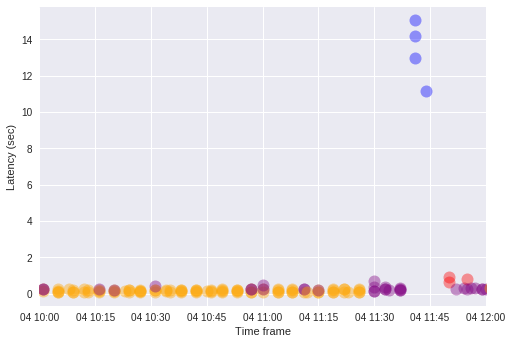

In [89]:
def calculate_best(df):
    clients = df.client.unique()
    overall_best = pd.DataFrame()
    for client in  clients:
        df_client = df.query('client == "'+client+'"')
        time_seq = df_client.time.unique()
        idx = df_client.groupby(['time'])['download'].transform(max) == df_client['download']
        worst_df = df_client[idx]
        
        #df_best = df_client.resample('10Min').mean()
        #print(df_best.head())
        idx = df_client.groupby(['time'])['download'].transform(min) == df_client['download']
        best_df = df_client[idx]
    
        overall_best = overall_best.append(best_df)
    return overall_best
        
def plot_best(df):
    df =  df.set_index(df.time)
    df = df.sort_index()
    groups = df.groupby(['time','proxy'])

    fig, ax = plt.subplots()
    labels = []
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        #print(group.time, group.download)
        #print(name[1])
        ax.plot(pd.to_datetime(group.time), group.download, marker='o', linestyle='', ms=12, 
                color=colorMap[name[1]], alpha=0.4)
        if proxyNames[name[1]] not in labels:
            print(proxyNames[name[1]])
            labels.append(proxyNames[name[1]])
    #ax.legend()
    plt.xlim('2018/02/04 10:00','2018/02/04 12:00')
    #plt.ylim(0,2)
    plt.xlabel('Time frame')
    plt.ylabel('Latency (sec)')
    #plt.legend(labels)
    plt.show()

overall_best = calculate_best(client_data)
plot_best(overall_best)